SCRIVI PRESENTAZIONE PROGETTO

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Section 1 -Loading and dataset manipulation-

## Market Temperature

SPIEGA IL SIGNIFICATO DEL DATASET

### Loading market temperature dataset

In [2]:
market_temp=pd.read_csv("Market_temp_index_uc_month.csv")
market_temp

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30
0,102001,0,United States,country,NaN,50.0,50.0,52.0,54.0,55.0,...,63.0,63.0,62.0,59.0,57.0,55.0,53.0,52.0,51.0,50.0
1,394913,1,"New York, NY",msa,NY,53.0,52.0,55.0,57.0,56.0,...,92.0,90.0,87.0,81.0,78.0,77.0,77.0,74.0,71.0,71.0
2,753899,2,"Los Angeles, CA",msa,CA,69.0,66.0,66.0,67.0,66.0,...,85.0,83.0,80.0,74.0,71.0,67.0,65.0,63.0,62.0,63.0
3,394463,3,"Chicago, IL",msa,IL,48.0,49.0,51.0,52.0,51.0,...,74.0,76.0,75.0,71.0,67.0,64.0,61.0,58.0,56.0,56.0
4,394514,4,"Dallas, TX",msa,TX,55.0,55.0,58.0,60.0,59.0,...,67.0,67.0,64.0,59.0,55.0,52.0,49.0,48.0,49.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,39.0,36.0,27.0,40.0,53.0,47.0,31.0,34.0,42.0,41.0
924,394743,936,"Ketchikan, AK",msa,AK,37.0,35.0,34.0,37.0,49.0,...,74.0,69.0,49.0,53.0,61.0,66.0,57.0,53.0,44.0,50.0
925,753874,937,"Craig, CO",msa,CO,3.0,23.0,52.0,67.0,56.0,...,61.0,55.0,59.0,57.0,48.0,33.0,21.0,28.0,41.0,37.0
926,395188,938,"Vernon, TX",msa,TX,51.0,45.0,NaN,48.0,65.0,...,83.0,78.0,64.0,65.0,61.0,52.0,57.0,56.0,51.0,43.0


In [3]:
market_temp.shape

(928, 88)

Once the dataset has been load, we notice that 83 columns (column 5-87) are dates. In order to perform further time series analysis it is necessary to have these columns as indexes.

In [4]:
# Trasforma il dataset usando melt
market_temp = market_temp.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'],  # Colonne che rimangono fisse
    var_name='Date',  # Nome della nuova colonna con le date
    value_name='MarketTemperature'  # Nome della colonna con i valori delle temperature
)

# Converte la colonna 'Date' in formato datetime
market_temp['Date'] = pd.to_datetime(market_temp['Date'])

# Imposta la colonna 'Date' come indice
market_temp.set_index('Date', inplace=True)

# Controlla il risultato
print(market_temp.head())
print(market_temp.index)

            RegionID  SizeRank       RegionName RegionType StateName  \
Date                                                                   
2018-01-31    102001         0    United States    country       NaN   
2018-01-31    394913         1     New York, NY        msa        NY   
2018-01-31    753899         2  Los Angeles, CA        msa        CA   
2018-01-31    394463         3      Chicago, IL        msa        IL   
2018-01-31    394514         4       Dallas, TX        msa        TX   

            MarketTemperature  
Date                           
2018-01-31               50.0  
2018-01-31               53.0  
2018-01-31               69.0  
2018-01-31               48.0  
2018-01-31               55.0  
DatetimeIndex(['2018-01-31', '2018-01-31', '2018-01-31', '2018-01-31',
               '2018-01-31', '2018-01-31', '2018-01-31', '2018-01-31',
               '2018-01-31', '2018-01-31',
               ...
               '2024-11-30', '2024-11-30', '2024-11-30', '2024-11-3

In [5]:
market_temp.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,MarketTemperature
Date,,,,,,
2018-01-31,102001,0,United States,country,NaN,50.0
2018-01-31,394913,1,"New York, NY",msa,NY,53.0
2018-01-31,753899,2,"Los Angeles, CA",msa,CA,69.0
2018-01-31,394463,3,"Chicago, IL",msa,IL,48.0
2018-01-31,394514,4,"Dallas, TX",msa,TX,55.0
2018-01-31,394692,5,"Houston, TX",msa,TX,48.0
2018-01-31,395209,6,"Washington, DC",msa,VA,57.0
2018-01-31,394974,7,"Philadelphia, PA",msa,PA,39.0
2018-01-31,394856,8,"Miami, FL",msa,FL,38.0


In [6]:
market_temp.index.unique()

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
      

Now the dataset has a correct structure: for each RegionID, which are 928 overall, we have all the 83 recordings about the market temperature. We expect 928 * 83 = 77024 rows.

In [7]:
print(f'The new datset stracture is:{market_temp.shape}')
print(f'As expected, the total number of rows is: {market_temp.shape[0]}')

The new datset stracture is:(77024, 6)
As expected, the total number of rows is: 77024


### Columns exploration

* Region ID: **unique identifier of the table**. It assigns an id for each US region. Region id 102001 does not correspond to a single region but to  United States country. The **number of regions is 928**.
* Size rank: ranks the regions from the most populated to the lest populated.
* Region Name: associates a name to the specific region id number. Id 102001 corresponds to United States country.
* Region Type: binary varibable.
  * 'country' the observation is associated to United States country.
  * 'msa' the observation is associated to a specific metropolitan statistical area.
* State Name: name of the specific state the region belongs to. If the recording has Region Name = United States the State Name is nan. The **number of states is 51**.
* Market Temperature: value of the market temperature index.

In [8]:
market_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77024 entries, 2018-01-31 to 2024-11-30
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RegionID           77024 non-null  int64  
 1   SizeRank           77024 non-null  int64  
 2   RegionName         77024 non-null  object 
 3   RegionType         77024 non-null  object 
 4   StateName          76941 non-null  object 
 5   MarketTemperature  74804 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 6.1+ MB


In [9]:
#regionid exploration
print(f"There are {len(market_temp['RegionID'].unique())} regions")

print(f"First region id are: {market_temp['RegionID'].unique()[0:10]}")

There are 928 regions
First region id are: [102001 394913 753899 394463 394514 394692 395209 394974 394856 394347]


In [10]:
#size rank exploration: this variable ranks the regions from the most populated to the less populated.
#In the overall ranking some position are missing.

print(f"Number of unique values: {len(market_temp['SizeRank'].unique())}")

#same values in the rank are missing
missing_values_in_size_rank = set(range(0, 928)) - set(market_temp['SizeRank'])

print("Missing values in the size rank:", sorted(missing_values_in_size_rank))

Number of unique values: 925
Missing values in the size rank: [33, 166, 204, 238, 256, 333, 362, 395, 423, 487, 763, 853, 886, 904]


In [11]:
#region name exploration. The total number of region names corresponds to the number of region id.
print(f" There are {len(market_temp['RegionName'].unique())} region names")

print(f"First region names are: {market_temp['RegionName'].unique()[0:10]}")

 There are 928 region names
First region names are: ['United States' 'New York, NY' 'Los Angeles, CA' 'Chicago, IL'
 'Dallas, TX' 'Houston, TX' 'Washington, DC' 'Philadelphia, PA'
 'Miami, FL' 'Atlanta, GA']


In [12]:
#region type exploration. It is a binary variable, indicating whether the recordings concernes a metropolitan area or to the all US country.
print(market_temp['RegionType'].unique())
print(f"the number of region types is: {len(market_temp['RegionType'].unique())}")

['country' 'msa']
the number of region types is: 2


In [13]:
#state name exploration
print(f"There are {len(market_temp['StateName'].unique())} state names")

print(f"First state names are: {market_temp['StateName'].unique()[0:10]}")


There are 51 state names
First state names are: [nan 'NY' 'CA' 'IL' 'TX' 'VA' 'PA' 'FL' 'GA' 'MA']


In [14]:
#we detect a nan state, it is associated to aggregated US data.
market_temp[market_temp['StateName'].isna()]

,RegionID,SizeRank,RegionName,RegionType,StateName,MarketTemperature
Date,,,,,,
2018-01-31,102001,0,United States,country,NaN,50.0
2018-02-28,102001,0,United States,country,NaN,50.0
2018-03-31,102001,0,United States,country,NaN,52.0
2018-04-30,102001,0,United States,country,NaN,54.0
2018-05-31,102001,0,United States,country,NaN,55.0
...,...,...,...,...,...,...
2024-07-31,102001,0,United States,country,NaN,55.0
2024-08-31,102001,0,United States,country,NaN,53.0
2024-09-30,102001,0,United States,country,NaN,52.0


In [15]:
#we replace nan values for state name with USA
market_temp['StateName'].fillna('USA', inplace=True)

print('now there are no nan values')
display(market_temp[market_temp['StateName'].isna()])
print('Nan values for State Name feature are replaced with USA')
display(market_temp[market_temp['StateName']=='USA'])


now there are no nan values


,RegionID,SizeRank,RegionName,RegionType,StateName,MarketTemperature
Date,,,,,,


Nan values for State Name feature are replaced with USA


,RegionID,SizeRank,RegionName,RegionType,StateName,MarketTemperature
Date,,,,,,
2018-01-31,102001,0,United States,country,USA,50.0
2018-02-28,102001,0,United States,country,USA,50.0
2018-03-31,102001,0,United States,country,USA,52.0
2018-04-30,102001,0,United States,country,USA,54.0
2018-05-31,102001,0,United States,country,USA,55.0
...,...,...,...,...,...,...
2024-07-31,102001,0,United States,country,USA,55.0
2024-08-31,102001,0,United States,country,USA,53.0
2024-09-30,102001,0,United States,country,USA,52.0


In [16]:
#MARKET TEMPERATURE EXPLORATION

#evaluate how many missing values are present and how they are distributed

print(f"There are {market_temp[market_temp['MarketTemperature'].isna()].shape[0]} missing values for the market temperature feature.")
display(market_temp[market_temp['MarketTemperature'].isna()])


There are 2220 missing values for the market temperature feature.


,RegionID,SizeRank,RegionName,RegionType,StateName,MarketTemperature
Date,,,,,,
2018-01-31,786258,483,"Fort Payne, AL",msa,AL,NaN
2018-01-31,845162,535,"Granbury, TX",msa,TX,NaN
2018-01-31,786250,595,"Alexander City, AL",msa,AL,NaN
2018-01-31,394538,596,"Douglas, GA",msa,GA,NaN
2018-01-31,394987,635,"Plymouth, IN",msa,IN,NaN
...,...,...,...,...,...,...
2024-11-30,394947,762,"Ottumwa, IA",msa,IA,NaN
2024-11-30,394331,774,"Angola, IN",msa,IN,NaN
2024-11-30,394777,776,"Laurinburg, NC",msa,NC,NaN


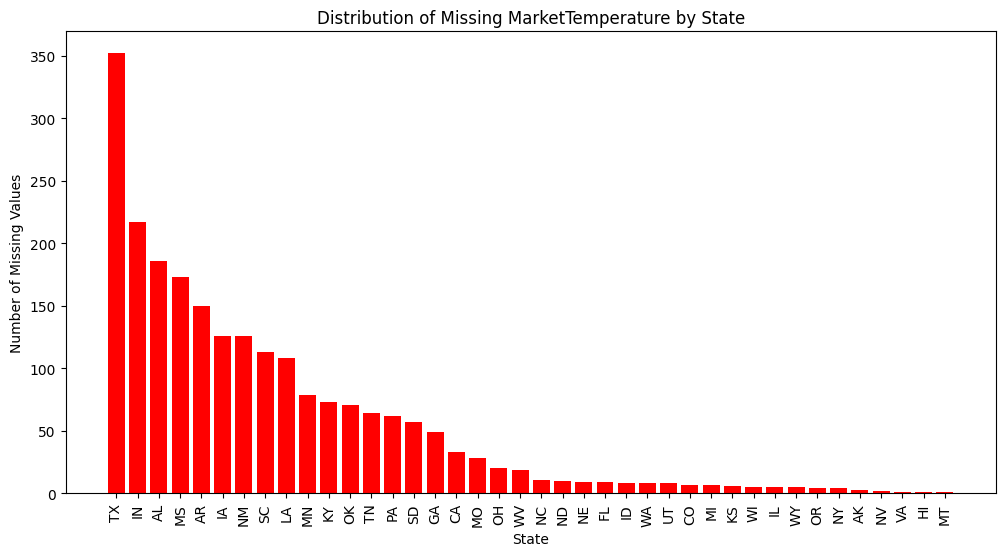

In [17]:
#Plot the number of missing values for the Market tamperature for each state
missing_market_temp_by_state = market_temp[market_temp['MarketTemperature'].isna()]['StateName'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(missing_market_temp_by_state.index, missing_market_temp_by_state.values, color='red')
plt.xlabel('State')
plt.ylabel('Number of Missing Values')
plt.title('Distribution of Missing MarketTemperature by State')
plt.xticks(rotation=90)
plt.show()

           Missing Count  Missing %
StateName                          
MS                 173.0       9.93
AL                 186.0       8.96
AR                 150.0       8.61
SC                 113.0       8.51
NM                 126.0       7.99
IA                 126.0       6.90
IN                 217.0       6.88
LA                 108.0       6.85
SD                  57.0       6.24
TX                 352.0       5.97
KY                  73.0       4.19
MN                  79.0       4.14
OK                  71.0       4.07
TN                  64.0       2.86
WV                  19.0       2.86
PA                  62.0       2.13
ND                  10.0       1.72
GA                  49.0       1.60
MO                  28.0       1.35
CA                  33.0       1.17


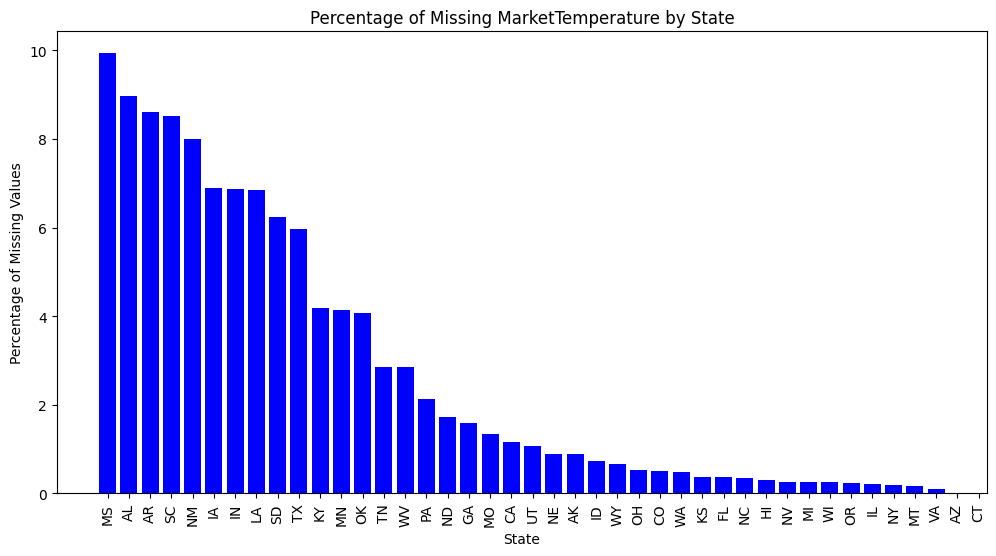

In [18]:
#Plot the % of missing values for the Market tamperature for each state.

#Count the number observations for each state
state_name_count= market_temp['StateName'].value_counts()

#Compute the perceentage of missing values for the market temperature for each state
missing_market_temp_percentage = (missing_market_temp_by_state / state_name_count * 100).round(2)

# Create the dataframe
missing_market_temp_df = pd.DataFrame({'Missing Count':missing_market_temp_by_state , 'Missing %': missing_market_temp_percentage})
missing_market_temp_df = missing_market_temp_df.sort_values(by='Missing %', ascending=False)

#print first results
print(missing_market_temp_df.head(20))

#Plot the % of missing values

plt.figure(figsize=(12, 6))
plt.bar(missing_market_temp_df.index, missing_market_temp_df['Missing %'], color='blue')
plt.xlabel('State')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing MarketTemperature by State')
plt.xticks(rotation=90)
plt.show()

In [19]:
#FIXING MISSING VALUES

#missing values for market temperature feature are filled with the previous value corresponding to the same state ('ffill'= firward fill)
#since forward fill may present problem if the first value is nan, we use it in combination with ('bfill'= backward fill) which takes the next values.

market_temp['MarketTemperature'] = market_temp.groupby('StateName')['MarketTemperature'].fillna(method='ffill')
market_temp['MarketTemperature'] = market_temp.groupby('StateName')['MarketTemperature'].fillna(method='bfill')


C:\Users\loren\AppData\Local\Temp\ipykernel_16156\742723274.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  market_temp['MarketTemperature'] = market_temp.groupby('StateName')['MarketTemperature'].fillna(method='ffill')
C:\Users\loren\AppData\Local\Temp\ipykernel_16156\742723274.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  market_temp['MarketTemperature'] = market_temp.groupby('StateName')['MarketTemperature'].fillna(method='bfill')


In [20]:
print(f"There are {market_temp[market_temp['MarketTemperature'].isna()].shape[0]} missing values for the market temperature feature.")
display(market_temp[market_temp['MarketTemperature'].isna()])

There are 0 missing values for the market temperature feature.


,RegionID,SizeRank,RegionName,RegionType,StateName,MarketTemperature
Date,,,,,,


## Median Sales price

### Loading median sale price dataset

SPIEGA IL SIGNIFICATO DEL DATASET

In [21]:
median_sale_price=pd.read_csv('Median_sale_price_uc_month.csv')
median_sale_price

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,170922.0,175612.0,177500.0,180000.0,185000.0,...,324000.0,335000.0,345000.0,350000.0,360000.0,369000.0,361000.0,360000.0,350500.0,355000.0
1,394913,1,"New York, NY",msa,NY,397000.0,390000.0,390000.0,390000.0,399900.0,...,570000.0,565000.0,575000.0,585000.0,615000.0,640000.0,649450.0,640000.0,625000.0,624451.0
2,753899,2,"Los Angeles, CA",msa,CA,470000.0,455000.0,457000.0,440000.0,435000.0,...,865000.0,915000.0,916250.0,950000.0,970000.0,960000.0,950500.0,932000.0,915000.0,941000.0
3,394463,3,"Chicago, IL",msa,IL,216750.0,220000.0,221000.0,227000.0,235000.0,...,279000.0,285000.0,300000.0,315000.0,325000.0,337275.0,330000.0,320000.0,317881.0,315000.0
4,394514,4,"Dallas, TX",msa,TX,138000.0,146000.0,144950.0,150000.0,156000.0,...,368000.0,380000.0,390000.0,400000.0,405000.0,400000.0,395000.0,390000.0,380000.0,384000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,394869,869,"Moberly, MO",msa,MO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,139000.0,152000.0,163250.0,180500.0,186000.0,46338.0,185900.0
709,394371,891,"Beatrice, NE",msa,NE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200000.0
710,753914,908,"Port Lavaca, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,177884.0,209255.0,103075.0,140948.0
711,395003,912,"Price, UT",msa,UT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228500.0,305000.0


In [22]:
median_sale_price.shape

(713, 206)

Once the dataset has been loaded, we notice that 201 columns (column 5-206) are dates. In order to perform further time series analysis it is necessary to have these columns as indexes.

In [23]:
median_sale_price = median_sale_price.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'],  # Colonne fisse
    var_name='Date',  # Nome della colonna con le date
    value_name='MedianSalesPrice'  # Nome della colonna con i valori dei prezzi medi di vendita
)

# Converte la colonna 'Date' in formato datetime
median_sale_price['Date'] = pd.to_datetime(median_sale_price['Date'])

# Imposta la colonna 'Date' come indice
median_sale_price.set_index('Date', inplace=True)

# Controlla il risultato
print(median_sale_price.head())
print(median_sale_price.index)

            RegionID  SizeRank       RegionName RegionType StateName  \
Date                                                                   
2008-02-29    102001         0    United States    country       NaN   
2008-02-29    394913         1     New York, NY        msa        NY   
2008-02-29    753899         2  Los Angeles, CA        msa        CA   
2008-02-29    394463         3      Chicago, IL        msa        IL   
2008-02-29    394514         4       Dallas, TX        msa        TX   

            MedianSalesPrice  
Date                          
2008-02-29          170922.0  
2008-02-29          397000.0  
2008-02-29          470000.0  
2008-02-29          216750.0  
2008-02-29          138000.0  
DatetimeIndex(['2008-02-29', '2008-02-29', '2008-02-29', '2008-02-29',
               '2008-02-29', '2008-02-29', '2008-02-29', '2008-02-29',
               '2008-02-29', '2008-02-29',
               ...
               '2024-10-31', '2024-10-31', '2024-10-31', '2024-10-31',
   

In [24]:
median_sale_price.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,MedianSalesPrice
Date,,,,,,
2008-02-29,102001,0,United States,country,NaN,170922.0
2008-02-29,394913,1,"New York, NY",msa,NY,397000.0
2008-02-29,753899,2,"Los Angeles, CA",msa,CA,470000.0
2008-02-29,394463,3,"Chicago, IL",msa,IL,216750.0
2008-02-29,394514,4,"Dallas, TX",msa,TX,138000.0
2008-02-29,394692,5,"Houston, TX",msa,TX,145000.0
2008-02-29,395209,6,"Washington, DC",msa,VA,339000.0
2008-02-29,394974,7,"Philadelphia, PA",msa,PA,190000.0
2008-02-29,394856,8,"Miami, FL",msa,FL,238000.0


In [25]:
median_sale_price.index.unique()

DatetimeIndex(['2008-02-29', '2008-03-31', '2008-04-30', '2008-05-31',
               '2008-06-30', '2008-07-31', '2008-08-31', '2008-09-30',
               '2008-10-31', '2008-11-30',
               ...
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31'],
              dtype='datetime64[ns]', name='Date', length=201, freq=None)

Now the dataset has a correct structure: for each RegionID, which are 713 overall, we have all the 201 recordings of the median sale price measured in different time instants. We expect 713 * 201 = 143313 rows.

In [26]:
print(f'The new datset stracture is:{median_sale_price.shape}')
print(f'As expected, the total number of rows is: {median_sale_price.shape[0]}')

The new datset stracture is:(143313, 6)
As expected, the total number of rows is: 143313


### Columns exploration

* Region ID: **unique identifier of the table**. It assigns an id for each US region. Region id 102001 does not correspond to a single region but to  United States country.
* Size rank: ranks the regions from the most populated to the lest populated.
* Region Name: associates a name to the specific region id number. Id 102001 corresponds to United States country.
* Region Type: binary varibable.
  * 'country' the observation is associated to United States country.
  * 'msa' the observation is associated to a specific metropolitan statistical area.
* State Name: name of the specific state the region belongs to. If the recording has Region Name = United States the State Name is nan.
* Median Sales Price: value of the market temperature index.

In [27]:
median_sale_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143313 entries, 2008-02-29 to 2024-10-31
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   RegionID          143313 non-null  int64  
 1   SizeRank          143313 non-null  int64  
 2   RegionName        143313 non-null  object 
 3   RegionType        143313 non-null  object 
 4   StateName         143112 non-null  object 
 5   MedianSalesPrice  115866 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 11.7+ MB


In [28]:
#regionid exploration
print(f"There are {len(median_sale_price['RegionID'].unique())} regions")

There are 713 regions


In [29]:
#as in the market temperature table, Region id 102001 does not correspond to a single region but to United States country
median_sale_price[median_sale_price['RegionID']==102001]

,RegionID,SizeRank,RegionName,RegionType,StateName,MedianSalesPrice
Date,,,,,,
2008-02-29,102001,0,United States,country,NaN,170922.0
2008-03-31,102001,0,United States,country,NaN,175612.0
2008-04-30,102001,0,United States,country,NaN,177500.0
2008-05-31,102001,0,United States,country,NaN,180000.0
2008-06-30,102001,0,United States,country,NaN,185000.0
...,...,...,...,...,...,...
2024-06-30,102001,0,United States,country,NaN,369000.0
2024-07-31,102001,0,United States,country,NaN,361000.0
2024-08-31,102001,0,United States,country,NaN,360000.0


In [30]:
#size rank exploration: this variable ranks the regions from the most populated to the less populated.
#In the overall ranking some position are missing.

print(f"Number of unique values: {len(median_sale_price['SizeRank'].unique())}")

#some values in the rank are missing
missing_values_in_size_rank_median_sales = set(range(0, 720)) - set(median_sale_price['SizeRank'])

print("Missing values in the size rank:", sorted(missing_values_in_size_rank_median_sales))

Number of unique values: 711
Missing values in the size rank: [33, 139, 166, 204, 238, 245, 256, 269, 333, 344, 346, 355, 362, 369, 371, 395, 407, 423, 425, 434, 435, 444, 458, 466, 480, 487, 493, 499, 503, 508, 512, 529, 531, 547, 552, 559, 563, 569, 592, 595, 596, 599, 605, 609, 611, 613, 618, 620, 622, 623, 625, 636, 637, 642, 646, 648, 651, 653, 661, 662, 667, 669, 679, 680, 685, 688, 689, 693, 694, 695, 699, 706, 707, 713, 717]


In [31]:
#region name exploration. The total number of region names corresponds to the number of region id.
print(f" There are {len(median_sale_price['RegionName'].unique())} region names")

print(f"First region names are: {median_sale_price['RegionName'].unique()[0:10]}")

 There are 713 region names
First region names are: ['United States' 'New York, NY' 'Los Angeles, CA' 'Chicago, IL'
 'Dallas, TX' 'Houston, TX' 'Washington, DC' 'Philadelphia, PA'
 'Miami, FL' 'Atlanta, GA']


In [32]:
#region type exploration. It is a binary variable, indicating whether the recordings concernes a metropolitan area or to the all US country.
print(median_sale_price['RegionType'].unique())
print(f"the number of region types is: {len(median_sale_price['RegionType'].unique())}")

['country' 'msa']
the number of region types is: 2


In [33]:
#state name exploration
print(f"There are {len(median_sale_price['StateName'].unique())} state names")

print(f"First state names are: {median_sale_price['StateName'].unique()[0:10]}")

There are 50 state names
First state names are: [nan 'NY' 'CA' 'IL' 'TX' 'VA' 'PA' 'FL' 'GA' 'MA']


In [34]:
#we detect a nan state, it is associated to aggregated US data.
median_sale_price[median_sale_price['StateName'].isna()]

,RegionID,SizeRank,RegionName,RegionType,StateName,MedianSalesPrice
Date,,,,,,
2008-02-29,102001,0,United States,country,NaN,170922.0
2008-03-31,102001,0,United States,country,NaN,175612.0
2008-04-30,102001,0,United States,country,NaN,177500.0
2008-05-31,102001,0,United States,country,NaN,180000.0
2008-06-30,102001,0,United States,country,NaN,185000.0
...,...,...,...,...,...,...
2024-06-30,102001,0,United States,country,NaN,369000.0
2024-07-31,102001,0,United States,country,NaN,361000.0
2024-08-31,102001,0,United States,country,NaN,360000.0


In [35]:
#we replace nan values for state name with USA
median_sale_price['StateName'].fillna('USA', inplace=True)

print('now there are no nan values')
display(median_sale_price[median_sale_price['StateName'].isna()])
print('Nan values for State Name feature are replaced with USA')
display(median_sale_price[median_sale_price['StateName']=='USA'])


now there are no nan values


,RegionID,SizeRank,RegionName,RegionType,StateName,MedianSalesPrice
Date,,,,,,


Nan values for State Name feature are replaced with USA


,RegionID,SizeRank,RegionName,RegionType,StateName,MedianSalesPrice
Date,,,,,,
2008-02-29,102001,0,United States,country,USA,170922.0
2008-03-31,102001,0,United States,country,USA,175612.0
2008-04-30,102001,0,United States,country,USA,177500.0
2008-05-31,102001,0,United States,country,USA,180000.0
2008-06-30,102001,0,United States,country,USA,185000.0
...,...,...,...,...,...,...
2024-06-30,102001,0,United States,country,USA,369000.0
2024-07-31,102001,0,United States,country,USA,361000.0
2024-08-31,102001,0,United States,country,USA,360000.0


In [36]:
#MEDIAN SALES PRICE EXPLORATION

#evaluate how many missing values are present and how they are distributed

print(f"There are {median_sale_price[median_sale_price['MedianSalesPrice'].isna()].shape[0]} missing values for the median sale price feature.")
display(median_sale_price[median_sale_price['MedianSalesPrice'].isna()])



There are 27447 missing values for the median sale price feature.


,RegionID,SizeRank,RegionName,RegionType,StateName,MedianSalesPrice
Date,,,,,,
2008-02-29,845159,86,"Poughkeepsie, NY",msa,NY,NaN
2008-02-29,394421,130,"Brownsville, TX",msa,TX,NaN
2008-02-29,395197,178,"Waco, TX",msa,TX,NaN
2008-02-29,395103,182,"Sioux Falls, SD",msa,SD,NaN
2008-02-29,394772,187,"Laredo, TX",msa,TX,NaN
...,...,...,...,...,...,...
2024-08-31,394371,891,"Beatrice, NE",msa,NE,NaN
2024-08-31,395003,912,"Price, UT",msa,UT,NaN
2024-09-30,394343,521,"Athens, OH",msa,OH,NaN


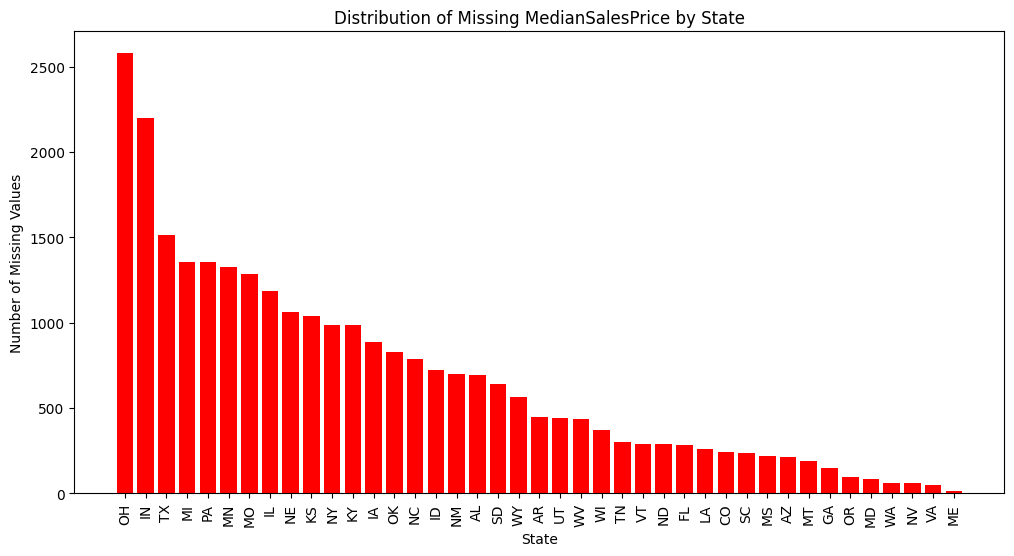

In [37]:
#Plot the number of missing values for the median sale price for each state
missing_median_sale_price_by_state = median_sale_price[median_sale_price['MedianSalesPrice'].isna()]['StateName'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(missing_median_sale_price_by_state.index, missing_median_sale_price_by_state.values, color='red')
plt.xlabel('State')
plt.ylabel('Number of Missing Values')
plt.title('Distribution of Missing MedianSalesPrice by State')
plt.xticks(rotation=90)
plt.show()

           Missing Count  Missing %
StateName                          
SD                 641.0      63.78
NE                1064.0      58.82
WY                 564.0      56.12
KS                1038.0      46.95
MN                1329.0      38.89
WV                 438.0      36.32
VT                 291.0      36.19
ND                 291.0      36.19
ID                 725.0      36.07
IN                2201.0      35.32
NM                 702.0      34.93
MO                1284.0      31.94
KY                 986.0      30.66
OH                2578.0      30.54
IA                 887.0      29.42
OK                 827.0      27.43
IL                1185.0      24.56
UT                 440.0      24.32
TX                1513.0      22.14
MI                1356.0      21.76


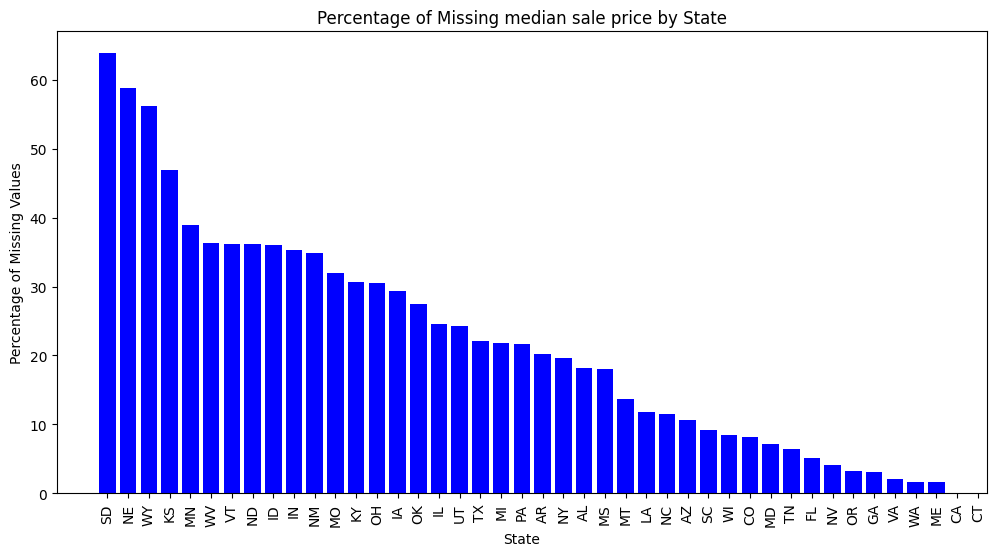

In [38]:
#Plot the % of missing values for the median sale price for each state.

#Count the number observations for each state
state_name_count_median_sale= median_sale_price['StateName'].value_counts()

#Compute the perceentage of missing values for the median sale price for each state
missing_median_sale_percentage = (missing_median_sale_price_by_state / state_name_count_median_sale * 100).round(2)

# Create the dataframe
missing_median_sale_df = pd.DataFrame({'Missing Count':missing_median_sale_price_by_state , 'Missing %': missing_median_sale_percentage})
missing_median_sale_df = missing_median_sale_df.sort_values(by='Missing %', ascending=False)

#print first results
print(missing_median_sale_df.head(20))

#Plot the % of missing values 

plt.figure(figsize=(12, 6))
plt.bar(missing_median_sale_df.index, missing_median_sale_df['Missing %'], color='blue')
plt.xlabel('State')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing median sale price by State')
plt.xticks(rotation=90)
plt.show()

In [39]:
total_missing_count = missing_median_sale_df['Missing Count'].sum()
print(total_missing_count)

27447.0


Differently from the market temperature index dataframe, the median sale price contains a lot of missing values (same of the states have until 60% of missing values).
However, the approach to fill missing value is the same adopted before: every missing value for the median sale price index is replaced with the following one in order of time, considering the same state.
**For further analysis and forecasting, states with starting high percentage of missing values will be exluded.**

In [44]:
#FIXING MISSING VALUES

#missing values for median sale price feature are filled with the previous value corresponding to the same state ('ffill'= firward fill)
#since forward fill may present problem if the first value is nan, we use it in combination with ('bfill'= backward fill) which takes the next values.

median_sale_price['MedianSalesPrice'] = median_sale_price.groupby('StateName')['MedianSalesPrice'].fillna(method='ffill')
median_sale_price['MedianSalesPrice'] = median_sale_price.groupby('StateName')['MedianSalesPrice'].fillna(method='bfill')

C:\Users\loren\AppData\Local\Temp\ipykernel_16156\4259984554.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  median_sale_price['MedianSalesPrice'] = median_sale_price.groupby('StateName')['MedianSalesPrice'].fillna(method='ffill')
C:\Users\loren\AppData\Local\Temp\ipykernel_16156\4259984554.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  median_sale_price['MedianSalesPrice'] = median_sale_price.groupby('StateName')['MedianSalesPrice'].fillna(method='bfill')


In [45]:
print(f"There are {median_sale_price[median_sale_price['MedianSalesPrice'].isna()].shape[0]} missing values for the median sale price feature.")
display(median_sale_price[median_sale_price['MedianSalesPrice'].isna()])

There are 0 missing values for the median sale price feature.


,RegionID,SizeRank,RegionName,RegionType,StateName,MedianSalesPrice
Date,,,,,,


# EDA
